In [4]:
HEAD_PATH = "Desktop/financial pkl"

- path of data


- path of our program

In [5]:
DATA_PATH = HEAD_PATH + "/pkl tick/"

- set working directory

In [6]:
import os
os.chdir(DATA_PATH)

FileNotFoundError: [Errno 2] No such file or directory: 'Desktop/financial pkl/pkl tick/'

- number of cores

In [4]:
CORE_NUM = int(os.environ['NUMBER_OF_PROCESSORS'])
CORE_NUM

16


- get working directory

In [5]:
os.getcwd()

'd:\\intern\\pkl tick'

- sample product, you can change to your specific product symbol
- for this quarter we analyze all of the black medals

In [6]:
product_list = ["IF", "IH", "IC", "TF", "T"]
product = product_list[0]

- directory of the product's data

In [7]:
dire = DATA_PATH + product
dire

'd:/intern/pkl tick/IF'

- get all available data

In [9]:
all_dates = list(map(lambda x: x,os.listdir(DATA_PATH + product)))
len(all_dates)
## 1092

1092

- we can see that there are 974 days
- all of the products have the same trading days
- so we just take a as an example
- get first several dates

In [10]:
all_dates[:6]
# ['20151202.pkl',
#  '20151203.pkl',
#  '20151204.pkl',
#  '20151207.pkl',
#  '20151208.pkl',
#  '20151209.pkl']


['20151202.pkl',
 '20151203.pkl',
 '20151204.pkl',
 '20151207.pkl',
 '20151208.pkl',
 '20151209.pkl']

- get last several dates

In [11]:
all_dates[-6:]
# ['20200521.pkl',
#  '20200522.pkl',
#  '20200525.pkl',
#  '20200526.pkl',
#  '20200527.pkl',
#  '20200528.pkl']

['20200521.pkl',
 '20200522.pkl',
 '20200525.pkl',
 '20200526.pkl',
 '20200527.pkl',
 '20200528.pkl']

- specify a date

In [12]:
date = "20180411"

- loading data set

In [13]:
import pandas as pd
import numpy as np
import math
import _pickle as cPickle
import gzip

with gzip.open(dire+"/"+date+".pkl", 'rb', compresslevel=1) as file_object:
    raw_data = file_object.read()
data = cPickle.loads(raw_data)

- get the column names of data

In [14]:
data.columns
## contract: contract name, product+expiration date
## date.time: date and time
## price: newest price of data
## cum.open.int: cumulative open interest
## open.int: newest open interest increment
## turnover: newest turnover increment
## qty: newest trading volume
## bid: bid price
## ask: ask price
## bid.qty: bid size
## ask.qty: ask size
## date: actual date
## time: acutal time
## milli: actual milli second
## mid.price: middle price of bid and ask
## buy.trade: active buy volume at level 1
## buy2.trade: active buy volume at other levels
## sell.trade: active sell volume at level 1
## sell2.trade: active sell volume at other levels
## log.price: log wpr (to be defined soon)
## ret: log return of last tick
## wpr: volume weighted price
## wpr.ret: price change of wpr
## high: highest price of last ask, last price, and this ask
## low: lowest price of last bid, last price, and thsi bid
## next.bid: estimated active sell price, used for backtesting
## next.ask: estimated active buy price, used for backtesting
## min.1024: rolling minimum of wpr over 1024 ticks
## max.1024: rolling maximum of wpr over 1024 ticks
## min.2048: rolling minimum of wpr over 2048 ticks
## max.2048: rolling maximum of wpr over 2048 ticks
## min.4096: rolling minimum of wpr over 4096 ticks
## max.4096: rolling maximum of wpr over 4096 ticks

## Q：关于这个数据的每个 column 的含义，能否介绍一下？一些缩写我不太了解什么含义？
## A：各名称含义如下：
## contract: 合约的名字，如 rb1605，表示螺纹钢合约，2016 年 5 月到期；
## date.time: 日期和时间合在一起，方便作图用；
## price: 最新的成交价；
## cum.open.int: 总的持仓量；
## open.int: 最新的持仓量改变量
## turnover: 最新的成交额；
## qty: 最新的成交量；
## bid: 买一价；
## ask: 卖一价；
## bid.qty: 买一量；
## ask.qty: 卖一量；
## date: 实际日期；
## time: 实际时间；
## milli: 毫秒数（上期所与中金所是 0、500，大商所随机，郑商所是 0）；
## mid.price: 买一和卖一的中间价；
## buy.trade: 一档主动买量（估算，非交易所提供）；
## buy2.trade: 其他价位主动买量（估算，非交易所提供）；
## sell.trade: 一档主动卖量（估算，非交易所提供）；
## sell2.trade: 其他价位主动买量（估算，非交易所提供）；
## log.price: wpr 的对数（wpr 下面定义）；
## ret: 最新一笔行情的对数收益率；
## wpr: 挂单量加权平均价；
## wpr.ret: wpr 的价格变化；
## min.1024: 过去 1024 笔行情的 wpr 最小值
## max.1024: 过去 1024 笔行情的 wpr 最大值；
## high: 当前 ask、前一个 ask、最新价的最高价（构造最小级别 K 线用）；
## low: 当前 bid、前一个 bid、最新价的最低价（狗仔最小级别 K 线用）；
## next.bid: 主动卖单的成交价（估算，非交易所提供），用于回测；
## next.ask: 主动买单的成交价（估算，非交易所提供），用于回测；
## min.1024: 1024跳滚动最低价
## max.1024: 1024跳滚动最高价
## min.2048: 2048跳滚动最低价
## max.2048: 2048跳滚动最高价
## min.4096: 4096滚动最低价
## max.4096: 4096滚动最高价

Index(['contract', 'date.time', 'price', 'cum.open.int', 'open.int',
       'turnover', 'qty', 'bid', 'ask', 'bid.qty', 'ask.qty', 'date', 'time',
       'milli', 'good', 'min.1024', 'max.1024', 'min.2048', 'max.2048',
       'min.4096', 'max.4096', 'mid.price', 'buy.trade', 'buy2.trade',
       'sell.trade', 'sell2.trade', 'log.price', 'ret', 'wpr', 'wpr.ret',
       'next.ask', 'next.bid'],
      dtype='object')

In [15]:
data.iloc[0:10,0:10]

#  	contract 	date.time 	price 	cum.open.int 	open.int 	turnover 	qty 	bid 	ask 	bid.qty
# 0 	IF1804 	2018-04-10 09:29:00.300 	3854.6 	27995 	-46 	70539180.0 	61 	3853.4 	3854.8 	4
# 1 	IF1804 	2018-04-10 09:30:00.300 	3853.4 	27992 	-3 	9249720.0 	8 	3853.4 	3854.4 	1
# 2 	IF1804 	2018-04-10 09:30:00.800 	3854.4 	27985 	-7 	12717960.0 	11 	3853.6 	3854.6 	13
# 3 	IF1804 	2018-04-10 09:30:01.300 	3854.4 	27981 	-4 	4625160.0 	4 	3854.2 	3854.4 	1
# 4 	IF1804 	2018-04-10 09:30:01.800 	3854.4 	27973 	-8 	11564160.0 	10 	3854.0 	3854.2 	1
# 5 	IF1804 	2018-04-10 09:30:02.300 	3854.0 	27966 	-7 	15031320.0 	13 	3853.8 	3854.0 	1
# 6 	IF1804 	2018-04-10 09:30:02.800 	3854.0 	27966 	0 	0.0 	0 	3853.8 	3854.0 	1
# 7 	IF1804 	2018-04-10 09:30:03.300 	3854.0 	27960 	-6 	6936960.0 	6 	3853.6 	3854.0 	10
# 8 	IF1804 	2018-04-10 09:30:03.800 	3854.0 	27957 	-3 	5780640.0 	5 	3853.6 	3854.2 	7
# 9 	IF1804 	2018-04-10 09:30:04.300 	3853.6 	27955 	-2 	3468420.0 	3 	3853.6 	3853.8 	5

,contract,date.time,price,cum.open.int,open.int,turnover,qty,bid,ask,bid.qty
0,IF1804,2018-04-10 09:29:00.300,3854.6,27995,-46,70539180.0,61,3853.4,3854.8,4
1,IF1804,2018-04-10 09:30:00.300,3853.4,27992,-3,9249720.0,8,3853.4,3854.4,1
2,IF1804,2018-04-10 09:30:00.800,3854.4,27985,-7,12717960.0,11,3853.6,3854.6,13
3,IF1804,2018-04-10 09:30:01.300,3854.4,27981,-4,4625160.0,4,3854.2,3854.4,1
4,IF1804,2018-04-10 09:30:01.800,3854.4,27973,-8,11564160.0,10,3854.0,3854.2,1
5,IF1804,2018-04-10 09:30:02.300,3854.0,27966,-7,15031320.0,13,3853.8,3854.0,1
6,IF1804,2018-04-10 09:30:02.800,3854.0,27966,0,0.0,0,3853.8,3854.0,1
7,IF1804,2018-04-10 09:30:03.300,3854.0,27960,-6,6936960.0,6,3853.6,3854.0,10
8,IF1804,2018-04-10 09:30:03.800,3854.0,27957,-3,5780640.0,5,3853.6,3854.2,7
9,IF1804,2018-04-10 09:30:04.300,3853.6,27955,-2,3468420.0,3,3853.6,3853.8,5


In [16]:
data.iloc[0:10,10:20]
#  	ask.qty 	date 	time 	milli 	good 	min.1024 	max.1024 	min.2048 	max.2048 	min.4096
# 0 	2 	20180410 	09:29:00 	300 	False 	3854.333333 	3854.333333 	3854.333333 	3854.333333 	3854.333333
# 1 	3 	20180410 	09:30:00 	300 	False 	3853.650000 	3854.333333 	3853.650000 	3854.333333 	3853.650000
# 2 	2 	20180410 	09:30:00 	800 	False 	3853.650000 	3854.466667 	3853.650000 	3854.466667 	3853.650000
# 3 	1 	20180410 	09:30:01 	300 	False 	3853.650000 	3854.466667 	3853.650000 	3854.466667 	3853.650000
# 4 	4 	20180410 	09:30:01 	800 	False 	3853.650000 	3854.466667 	3853.650000 	3854.466667 	3853.650000
# 5 	3 	20180410 	09:30:02 	300 	False 	3853.650000 	3854.466667 	3853.650000 	3854.466667 	3853.650000
# 6 	3 	20180410 	09:30:02 	800 	False 	3853.650000 	3854.466667 	3853.650000 	3854.466667 	3853.650000
# 7 	1 	20180410 	09:30:03 	300 	False 	3853.650000 	3854.466667 	3853.650000 	3854.466667 	3853.650000
# 8 	1 	20180410 	09:30:03 	800 	False 	3853.650000 	3854.466667 	3853.650000 	3854.466667 	3853.650000
# 9 	1 	20180410 	09:30:04 	300 	False 	3853.650000 	3854.466667 	3853.650000 	3854.466667 	3853.650000

,ask.qty,date,time,milli,good,min.1024,max.1024,min.2048,max.2048,min.4096
0,2,20180410,09:29:00,300,False,3854.333333,3854.333333,3854.333333,3854.333333,3854.333333
1,3,20180410,09:30:00,300,False,3853.650000,3854.333333,3853.650000,3854.333333,3853.650000
2,2,20180410,09:30:00,800,False,3853.650000,3854.466667,3853.650000,3854.466667,3853.650000
3,1,20180410,09:30:01,300,False,3853.650000,3854.466667,3853.650000,3854.466667,3853.650000
4,4,20180410,09:30:01,800,False,3853.650000,3854.466667,3853.650000,3854.466667,3853.650000
5,3,20180410,09:30:02,300,False,3853.650000,3854.466667,3853.650000,3854.466667,3853.650000
6,3,20180410,09:30:02,800,False,3853.650000,3854.466667,3853.650000,3854.466667,3853.650000
7,1,20180410,09:30:03,300,False,3853.650000,3854.466667,3853.650000,3854.466667,3853.650000
8,1,20180410,09:30:03,800,False,3853.650000,3854.466667,3853.650000,3854.466667,3853.650000
9,1,20180410,09:30:04,300,False,3853.650000,3854.466667,3853.650000,3854.466667,3853.650000


In [17]:
data.iloc[0:10,20:]

# max.4096 	mid.price 	buy.trade 	buy2.trade 	sell.trade 	sell2.trade 	log.price 	ret 	wpr 	wpr.ret 	next.ask 	next.bid
# 0 	3854.333333 	3854.1 	30.0 	0.0 	30.0 	0.0 	8.256953 	0.002216 	3854.333333 	8.533333 	3854.4 	3853.4
# 1 	3854.333333 	3853.9 	2.0 	0.0 	6.0 	0.0 	8.256776 	-0.000177 	3853.650000 	-0.683333 	3854.6 	3853.6
# 2 	3854.466667 	3854.1 	7.0 	0.0 	4.0 	0.0 	8.256988 	0.000212 	3854.466667 	0.816667 	3854.4 	3854.2
# 3 	3854.466667 	3854.3 	2.0 	0.0 	2.0 	0.0 	8.256945 	-0.000043 	3854.300000 	-0.166667 	3854.2 	3854.0
# 4 	3854.466667 	3854.1 	4.0 	6.0 	0.0 	0.0 	8.256877 	-0.000067 	3854.040000 	-0.260000 	3854.0 	3853.8
# 5 	3854.466667 	3853.9 	12.0 	0.0 	1.0 	0.0 	8.256828 	-0.000049 	3853.850000 	-0.190000 	3854.0 	3853.8
# 6 	3854.466667 	3853.9 	0.0 	0.0 	0.0 	0.0 	8.256828 	0.000000 	3853.850000 	0.000000 	3854.0 	3853.6
# 7 	3854.466667 	3853.8 	2.0 	0.0 	4.0 	0.0 	8.256857 	0.000029 	3853.963636 	0.113636 	3854.2 	3853.6
# 8 	3854.466667 	3853.9 	2.0 	0.0 	3.0 	0.0 	8.256899 	0.000042 	3854.125000 	0.161364 	3853.8 	3853.6
# 9 	3854.466667 	3853.7 	1.0 	0.0 	2.0 	0.0 	8.256806 	-0.000093 	3853.766667 	-0.358333 	3854.6 	3853.8

,max.4096,mid.price,buy.trade,buy2.trade,sell.trade,sell2.trade,log.price,ret,wpr,wpr.ret,next.ask,next.bid
0,3854.333333,3854.1,30.0,0.0,30.0,0.0,8.256953,0.002216,3854.333333,8.533333,3854.4,3853.4
1,3854.333333,3853.9,2.0,0.0,6.0,0.0,8.256776,-0.000177,3853.650000,-0.683333,3854.6,3853.6
2,3854.466667,3854.1,7.0,0.0,4.0,0.0,8.256988,0.000212,3854.466667,0.816667,3854.4,3854.2
3,3854.466667,3854.3,2.0,0.0,2.0,0.0,8.256945,-0.000043,3854.300000,-0.166667,3854.2,3854.0
4,3854.466667,3854.1,4.0,6.0,0.0,0.0,8.256877,-0.000067,3854.040000,-0.260000,3854.0,3853.8
5,3854.466667,3853.9,12.0,0.0,1.0,0.0,8.256828,-0.000049,3853.850000,-0.190000,3854.0,3853.8
6,3854.466667,3853.9,0.0,0.0,0.0,0.0,8.256828,0.000000,3853.850000,0.000000,3854.0,3853.6
7,3854.466667,3853.8,2.0,0.0,4.0,0.0,8.256857,0.000029,3853.963636,0.113636,3854.2,3853.6
8,3854.466667,3853.9,2.0,0.0,3.0,0.0,8.256899,0.000042,3854.125000,0.161364,3853.8,3853.6
9,3854.466667,3853.7,1.0,0.0,2.0,0.0,8.256806,-0.000093,3853.766667,-0.358333,3854.6,3853.8


- plot the price

In [18]:
# pip install plotly
import matplotlib.pyplot as plt

plt.figure(1, figsize=(16, 10))
plt.plot(data["price"].values);

- specific a range of price

In [19]:
range_ = (data["time"] >="09:00:00") & (data["time"]<"15:15:02") 

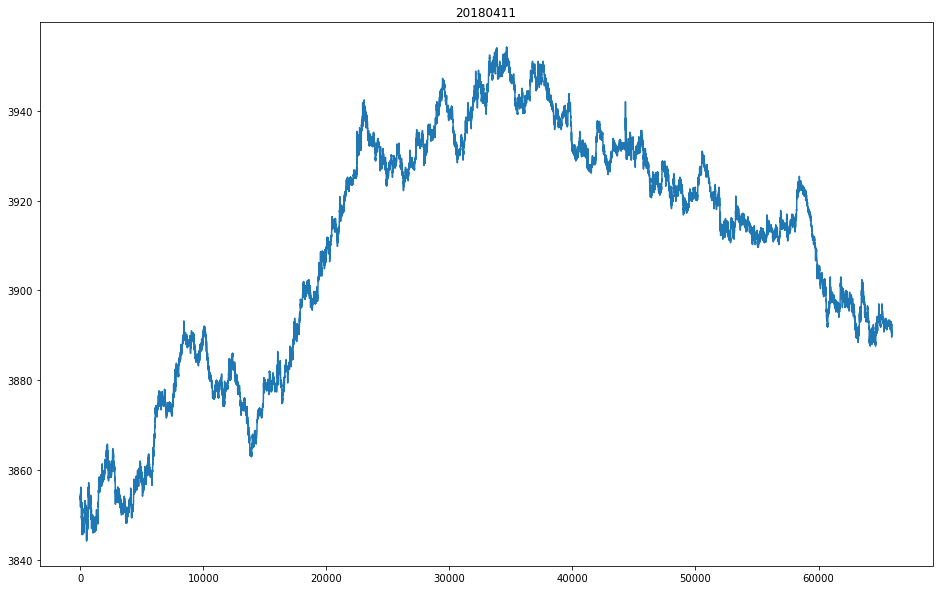

In [20]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(data["price"][range_].values);

- add time

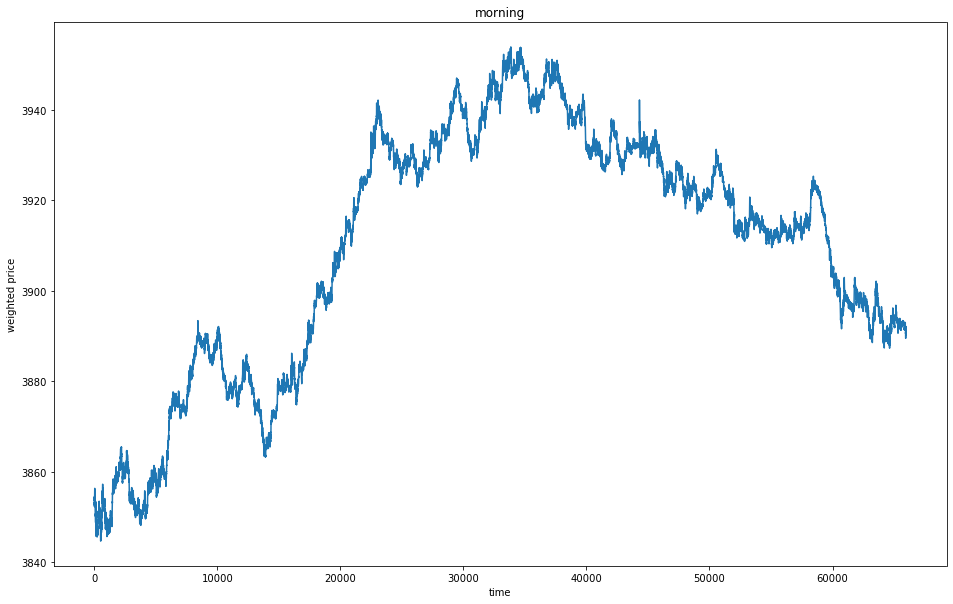

In [21]:
plt.figure(1, figsize=(16, 10))
plt.title("morning")
plt.xlabel("time")
plt.ylabel("weighted price")
plt.plot(data.index[range_].values, data["wpr"][range_].values);
## there is a break between 11:30 and 13:30

- plot price change

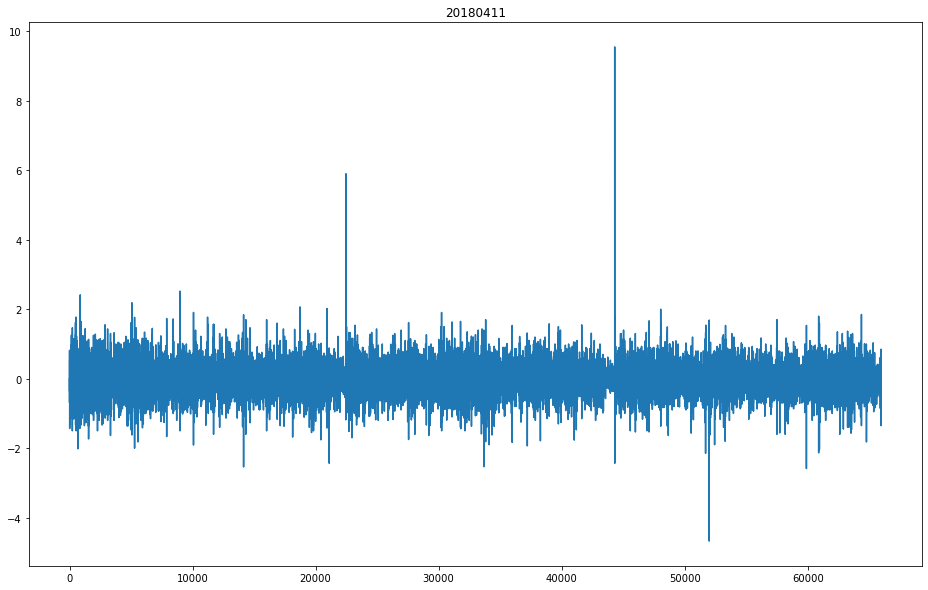

In [22]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
data["wpr.ret"].values[0]=0
plt.plot(data["wpr.ret"].values);

- plot price log return

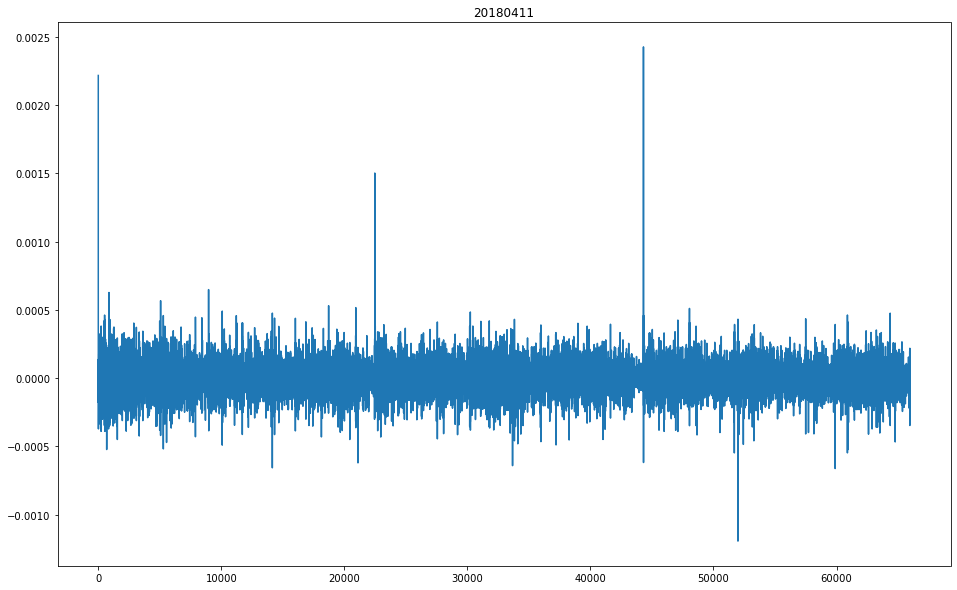

In [23]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(data["ret"].values);

- count the number of rising ticks

In [24]:
sum(data['ret']>0)/len(data)
## 0.384425310008186

0.384425310008186

- count the number of falling ticks

In [25]:
sum(data['ret']<0)/len(data)
## 0.38528939150471453

0.38528939150471453

In [26]:
sum(data['ret']==0)/len(data)
## 0.23028529848709942

0.23028529848709942

- count the number of total ticks

In [27]:
len(data)
## 65966

65966

- formula to calculate wpr:

In [28]:
wpr = (data["bid"]*data["ask.qty"]+data["ask"]*data["bid.qty"])/(data["bid.qty"]+data["ask.qty"])

- upper limit or lower limit

In [29]:
limit = (data["ask.qty"]==0) | (data["bid.qty"]==0)

- in this case, one of bid and ask price is zero, so using newest price as wpr

In [30]:
wpr[limit] = data["price"][limit]

In [31]:
wpr.head()
# 0    3854.333333
# 1    3853.650000
# 2    3854.466667
# 3    3854.300000
# 4    3854.040000
# dtype: float64

0    3854.333333
1    3853.650000
2    3854.466667
3    3854.300000
4    3854.040000
dtype: float64

In [32]:
data["wpr"].head()
# 0    3854.333333
# 1    3853.650000
# 2    3854.466667
# 3    3854.300000
# 4    3854.040000
# Name: wpr, dtype: float64

0    3854.333333
1    3853.650000
2    3854.466667
3    3854.300000
4    3854.040000
Name: wpr, dtype: float64

In [33]:
sum(abs(wpr - data["wpr"]) > 0.00000001)
## 0

0

- stationary test for return series

- load related package

In [34]:
import statsmodels.tsa.stattools as ts

In [35]:
result = ts.adfuller(data["ret"][data["good"]], maxlag=int(pow(len(data["ret"][data["good"]])-1,(1/3))), regression='ct', autolag=None)
result
# (-29.178269124705384,
#  0.0,
#  27,
#  21809,
#  {'1%': -3.9591851682232386,
#   '5%': -3.4106913303874435,
#   '10%': -3.127168564813546})

## for this test the smaller the value the more stationary it is
## so it's stationary

(-29.178269124705384,
 0.0,
 27,
 21809,
 {'1%': -3.9591851682232386,
  '5%': -3.4106913303874435,
  '10%': -3.127168564813546})

In [36]:
result = ts.kpss(data["ret"][data["good"]], regression='c', lags=int(3*math.sqrt(len(data["ret"][data["good"]]))/13))
result

# (0.11664340983589037,
#  0.1,
#  34,
#  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

    ## for KPSS test, small value means level stationary, large value means trend
    ## its p-value is 0.1 so it's stationary

d:\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.11664340983589037,
 0.1,
 34,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

- get price movements of 120 ticks, it's about 1 minute

In [37]:
ret_120 = (data["ret"].rolling(120).sum()).dropna().reset_index(drop=True)

- check correctness

In [38]:
sum(data["ret"][0:120])
## 0.0017666013115711315

0.0017666013115711315

In [39]:
ret_120.iloc[0]
## 0.0017666013115711315

0.0017666013115711315

- plot the price movements of 120 ticks

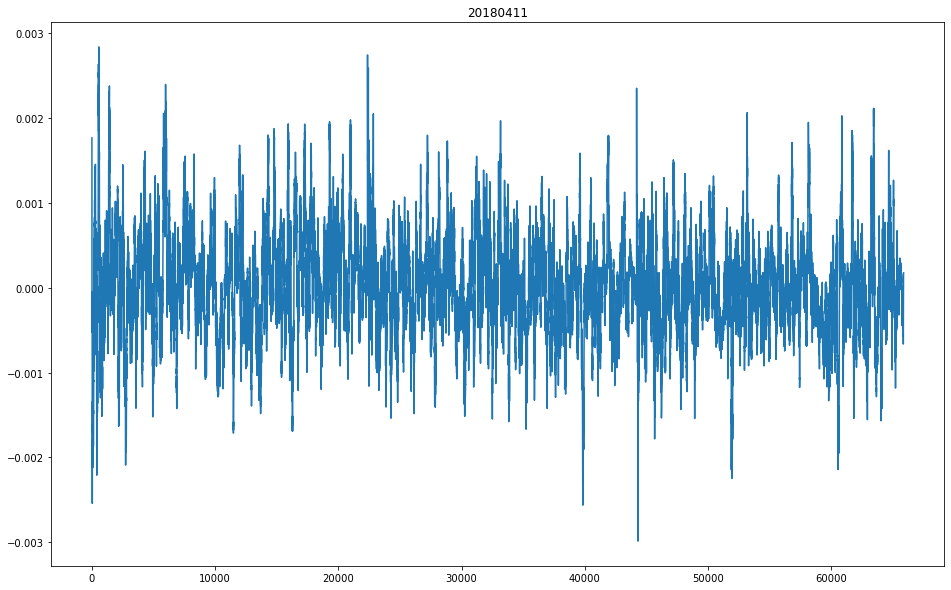

In [40]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(ret_120.values);

In [41]:
len(ret_120)
## 65847

65847

In [42]:
len(data)
## 65966

65966

In [43]:
range_120 = ((np.mod(np.arange(0, len(data)),120)==0) & data["good"])[119:]

In [44]:
len(ret_120)
## 65847

65847

In [45]:
ret_120.iloc[np.where(range_120)]

# 22441    0.000968
# 22561    0.001068
# 22681   -0.000127
# 22801    0.001093
# 22921    0.000449
#            ...   
# 43681    0.000225
# 43801   -0.000157
# 43921    0.000138
# 44041    0.000089
# 44161   -0.000184
# Name: ret, Length: 182, dtype: float64

22441    0.000968
22561    0.001068
22681   -0.000127
22801    0.001093
22921    0.000449
           ...   
43681    0.000225
43801   -0.000157
43921    0.000138
44041    0.000089
44161   -0.000184
Name: ret, Length: 182, dtype: float64

- test whether ret.120 is stationary

In [46]:
result = ts.adfuller(ret_120.iloc[np.where(range_120)], maxlag=int(pow(len(ret_120.iloc[np.where(range_120)])-1,(1/3))), regression='ct', autolag=None)
result

# (-6.26410761422586,
#  6.018493860372522e-07,
#  5,
#  176,
#  {'1%': -4.0111504185278335,
#   '5%': -3.435735487048624,
#   '10%': -3.1418717251772637})

(-6.26410761422586,
 6.018493860372522e-07,
 5,
 176,
 {'1%': -4.0111504185278335,
  '5%': -3.435735487048624,
  '10%': -3.1418717251772637})

In [47]:
result = ts.kpss(ret_120.iloc[np.where(range_120)], regression='c', lags=int(3*math.sqrt(len(ret_120.iloc[np.where(range_120)]))/13))
result

# (0.1370505348251051,
#  0.1,
#  3,
#  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

## it's still stationary

d:\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.1370505348251051,
 0.1,
 3,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

- we can check longer period

In [48]:
ret_2000 = (data["ret"].rolling(2000).sum()).dropna().reset_index(drop=True)

- plot the price change

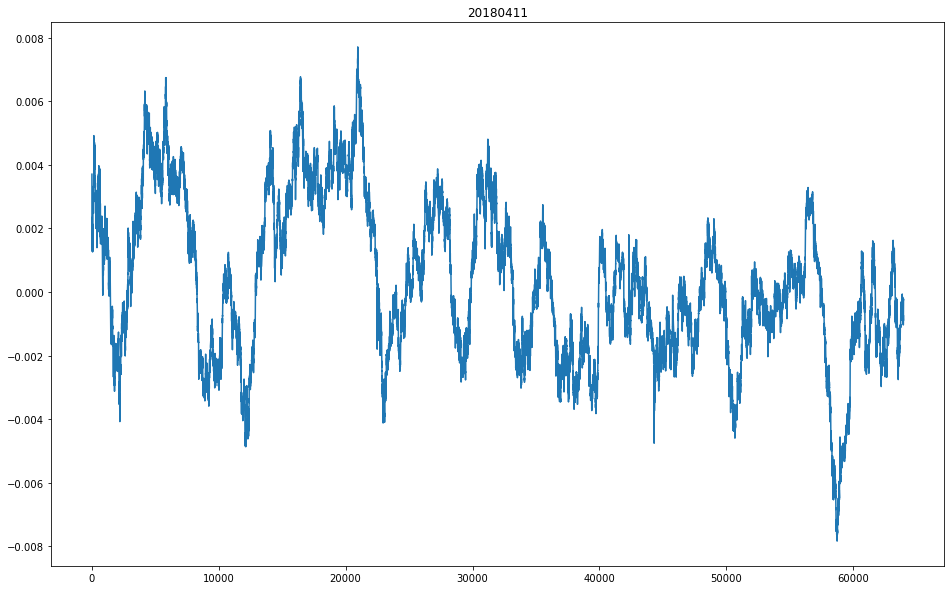

In [49]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(ret_2000.values);

In [50]:
sum((np.mod(np.arange(1, len(data)+1),2000)==0) & (data["good"]))
## 11

11

- So there are too few points to test for stationary

In [51]:
import pandas as pd
import _pickle as cPickle
import gzip

In [52]:
def load(path):
    with gzip.open(path, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    return cPickle.loads(raw_data)

- there may be too few data
- we can check for more days

In [53]:
def get_sample_ret(date, period):
    data = load(DATA_PATH + product+"/"+date)
    ret = (data["ret"].rolling(period).sum()).dropna().reset_index(drop=True)
    range = ((np.mod(np.arange(0, len(data)),period)==0) & data["good"])[(period-1):]
    return ret.iloc[np.where(range)]


In [54]:
import functools
import dask
from dask import compute, delayed
def parLapply(CORE_NUM, iterable, func, *args, **kwargs):
    with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
        f_par = functools.partial(func, *args, **kwargs)
        result = compute([delayed(f_par)(item) for item in iterable])[0]
    return result

In [55]:
%%time
result = parLapply(CORE_NUM, all_dates, get_sample_ret, period=4096)
;

# Wall time: 1min 29s

Wall time: 1min 29s


''

In [56]:
from itertools import chain 

In [57]:
ret_long = list(chain.from_iterable(result)) 

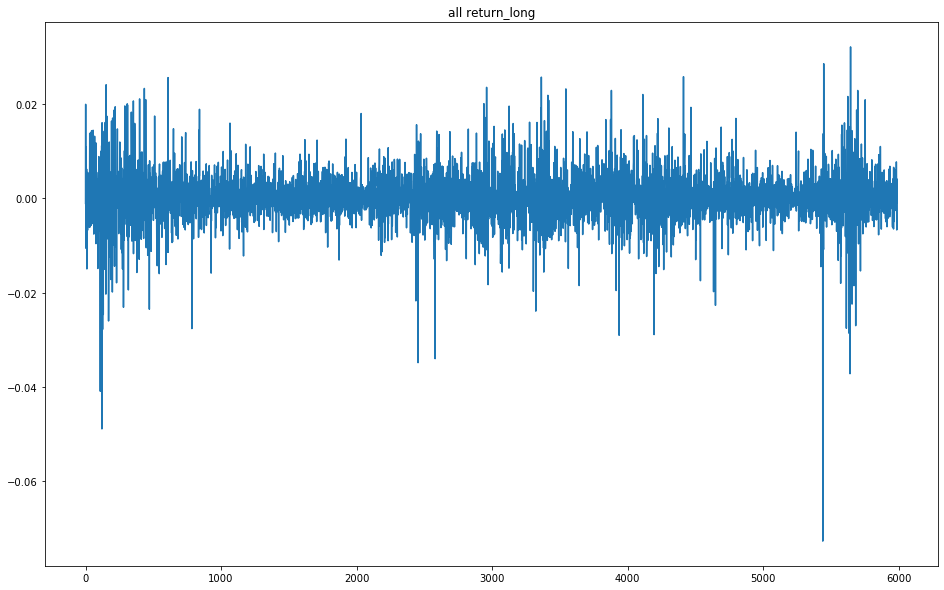

In [58]:
plt.figure(1, figsize=(16, 10))
plt.title("all return_long")
plt.plot(ret_long);

In [59]:
result = ts.adfuller(ret_long, maxlag=int(pow(len(ret_long)-1,(1/3))), regression='ct', autolag=None)
result

# (-17.055321209344065,
#  0.0,
#  18,
#  5882,
#  {'1%': -3.96030994167418,
#   '5%': -3.4112366741794693,
#   '10%': -3.1274896919307884})

## it's still stationary

(-17.188728397735332,
 0.0,
 18,
 5972,
 {'1%': -3.960286722032131,
  '5%': -3.4112254176713304,
  '10%': -3.1274830639419404})

In [60]:
result = ts.kpss(ret_long, regression='c', lags=int(3*math.sqrt(len(ret_long))/13))
result

# (0.07542746846350935,
#  0.1,
#  17,
#  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

# ## p-value is 0.1 so it's stationary

d:\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.07542746846350935,
 0.1,
 17,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

- we can see that, it's still stationary for 4096 ticks


- check simple strategy


- set triger threshold

In [62]:
threshold = 0.001
len(ret_long)
# 5991

5991


- make up the return series to match uo with original data

- plot price series

- number of ticks above the threshold, to be long position

In [64]:
sum(np.array(ret_long)>threshold)
## 2274

2274

- number of ticks below negetive threshold, to be short position

In [66]:
sum(np.array(ret_long)< -threshold)
## 2299

2299

- set position


- number of ticks

## ############## The following part is bad example of trading ##########

- set position just the sanme as signal

In [67]:
## backtest method: signal value decides position
from collections import OrderedDict
def get_daily_pnl_fast(date, product="rb", period=4096, tranct_ratio=False, threshold=0.001, tranct=0.21, noise=0):
    with gzip.open(dire+"/"+date, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    ori_data = cPickle.loads(raw_data) ## original data
    data=ori_data[ori_data["good"]] ## the middle day of original data
    n_bar = len(data)  ## number of bars
    unit = np.std(data["ret"]) ## standard deviation of return
    np.random.seed(10)
    ##  we repeat the above code to get daily result
    ret_long = (data["ret"].rolling(period).sum()).dropna().reset_index(drop=True) ## future return, used as signal
    ret_long = ret_long.append(pd.Series([0]*(len(data)-len(ret_long)))).reset_index(drop=True)
    signal = pd.Series([0] * n_bar)
    signal[(ret_long>threshold) & (np.array(data["next.ask"])>0)] = 1 ## signal>thre, position =1
    signal[(ret_long< -threshold) & (np.array(data["next.bid"])>0)] = -1 ## signal< -thre, position = -1
    position=signal
    position[0]=0
    position[n_bar-1] = 0 ## close position before the end of day
    position[n_bar-2] = 0
    change_pos = position - position.shift(1)
    change_pos[0] = 0
    change_base = np.zeros(n_bar)
    change_buy = np.array(change_pos>0)
    change_sell = np.array(change_pos<0)
    if (tranct_ratio):
        change_base[change_buy] = data["next.ask"][change_buy]*(1+tranct) ## buy price, use next ask, tranct cost use notional*ratio
        change_base[change_sell] = data["next.bid"][change_sell]*(1-tranct) ## sell price use next bid
    else:
        change_base[change_buy] = data["next.ask"][change_buy]+tranct ## fix tranct cost per share
        change_base[change_sell] = data["next.bid"][change_sell]-tranct
    final_pnl = -sum(change_base*change_pos) ## total pnl, there is a negative sign, because selling get money and buying pay money
    turnover = sum(change_base*abs(change_pos))
    num = sum((position!=0) & (change_pos!=0)) ## number of trades
    hld_period = sum(position!=0)   ## holding period
    ## finally we combine the statistics into a data frame
    #result = pd.DataFrame({"final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}, index=[0])
    #result = {"date": date, "final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}
    result = OrderedDict([("date", date), ("final.pnl", final_pnl), ("turnover", turnover), ("num", num), ("hld.period", hld_period)])
    return result

- we try one day as an example

In [68]:
import dask
from dask import compute, delayed

get_daily_pnl_fast(all_dates[0], product="IF", period=4096, tranct_ratio=True, threshold=0.001, tranct=0.23e-4)
# OrderedDict([('date', '20151202.pkl'),
#              ('final.pnl', -8.955003000020042),
#              ('turnover', 363261.00001380005),
#              ('num', 51),
#              ('hld.period', 17227)])

OrderedDict([('date', '20151202.pkl'),
             ('final.pnl', -8.955003000020042),
             ('turnover', 363261.00001380005),
             ('num', 51),
             ('hld.period', 17227)])

- Then we use it for all days

In [69]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl_fast, product="IF", period=4096, tranct_ratio=True, threshold=0.001, tranct=0.25e-4, noise=0)
    result = compute([delayed(f_par)(date) for date in all_dates])[0]
    
# Wall time: 34.4 s

Wall time: 34.4 s


- Now we can use a function to check its performance

In [70]:
from collections import OrderedDict
def get_performance(result, spread=1):
    aa = pd.DataFrame(result)
    aa.set_index("date", inplace=True)
    col_names = aa.columns
    row_names = aa.index
    stat = aa.values
    stat = np.array(np.rec.fromrecords(aa.values))
    np_names = aa.dtypes.index.tolist()
    stat.dtype.names = tuple([name for name in np_names])
    stat = pd.DataFrame(stat)
    pnl = stat["final.pnl"].cumsum()
    date_str = [n[0:8] for n in row_names]
    date_format = [pd.to_datetime(d) for d in date_str]
    plt.figure(1, figsize=(16, 10))
    plt.title("")
    plt.xlabel("date")
    plt.ylabel("pnl")
    plt.plot(date_format, pnl)
    n_days = len(stat)
    num = stat["num"].mean()
    if num==0:
        return;
    if (stat["final.pnl"].std()==0):
        sharpe = 0
    else:
        sharpe = stat["final.pnl"].mean()/stat["final.pnl"].std()*math.sqrt(250)
    drawdown = max(pnl.cummax()-pnl)/pnl.iloc[-1]
    mar = 1/drawdown
    win_ratio = sum(stat["final.pnl"]>0)/n_days
   
    avg_pnl = sum(stat["final.pnl"])/sum(stat["num"])/spread
    hld_period = sum(stat["hld.period"])/sum(stat["num"])
    return OrderedDict([("sharpe", sharpe), ("drawdown", drawdown), ("mar", mar), ("win.ratio", win_ratio)
                        , ("num", num), ("avg.pnl", avg_pnl), ("hld.period", hld_period)])

d:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,-18.166663,-1.000028,-0.999972,0.095238,135.821429,-0.473323,101.105868


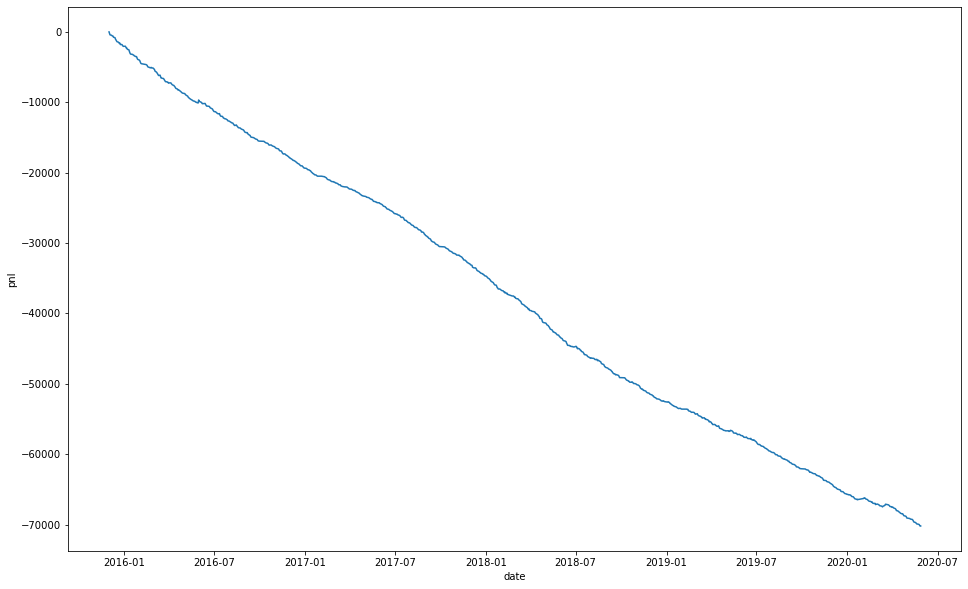

In [71]:
pd.DataFrame(get_performance(result, 1), index=[0])

# sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 0 	-18.166663 	-1.000028 	-0.999972 	0.095238 	135.821429 	-0.473323 	101.105868



- we can see it's really bad
- we can try increasing threshold

In [72]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl_fast, product="IF", period=4096, tranct_ratio=True, threshold=0.01, tranct=0.25e-4, noise=0)
    result_2 = compute([delayed(f_par)(date) for date in all_dates])[0]

Wall time: 34.6 s


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,-3.088528,-1.03146,-0.9695,0.094322,10.886447,-0.368044,59.974176


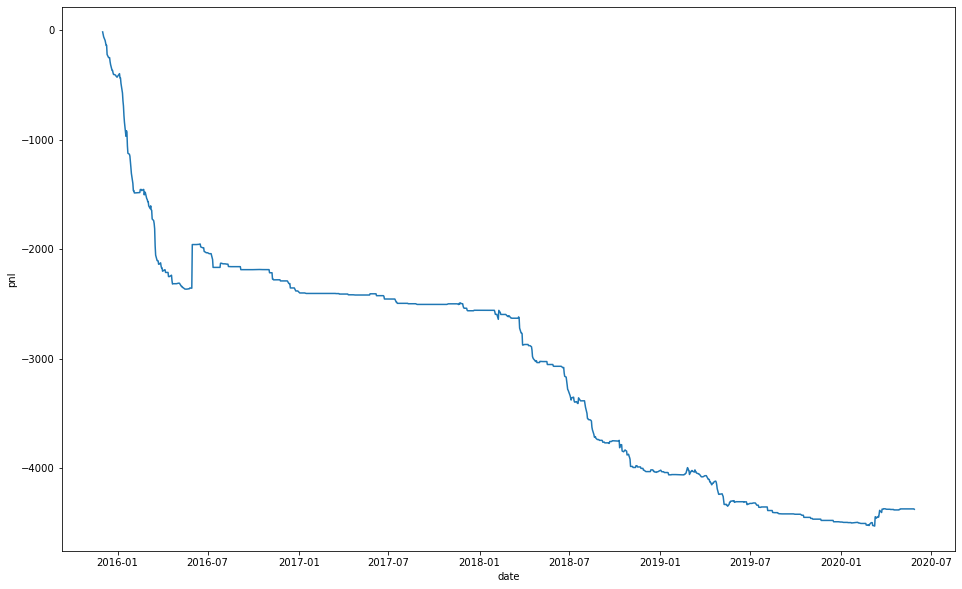

In [73]:
pd.DataFrame(get_performance(result_2), index=[0])


# 	sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 0 	-3.088528 	-1.03146 	-0.9695 	0.094322 	10.886447 	-0.368044 	59.974176

In [74]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl_fast, product="IF", period=4096, tranct_ratio=True, threshold=0.02, tranct=0.25e-4, noise=0)
    result_3 = compute([delayed(f_par)(date) for date in all_dates])[0]

Wall time: 34.9 s


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,-0.140054,-3.57817,-0.279472,0.019462,0.94532,-0.111483,55.606863


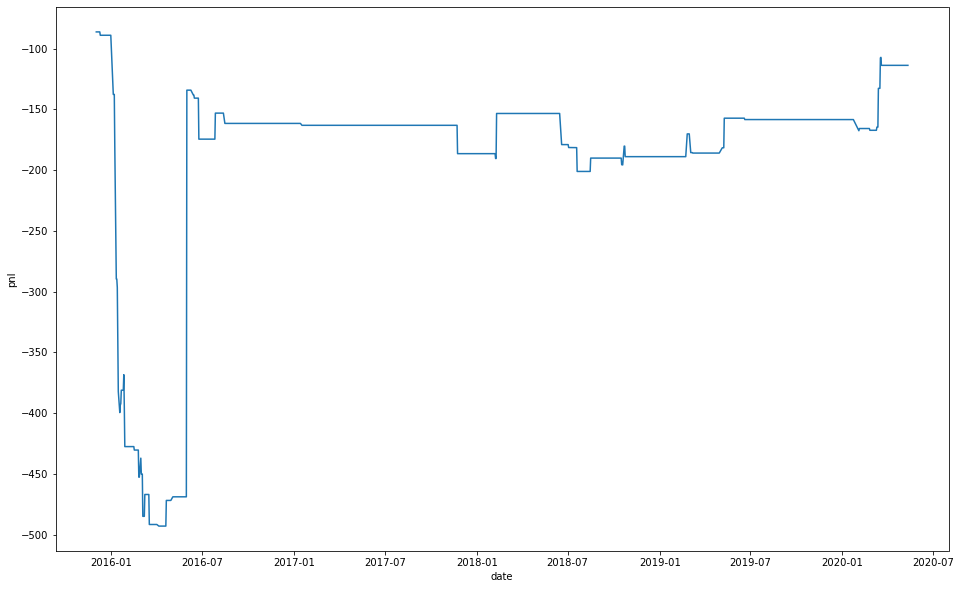

In [82]:
pd.DataFrame(get_performance(result_3, 1), index=[0])

#  	sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 0 	-0.140054 	-3.57817 	-0.279472 	0.019462 	0.94532 	-0.111483 	55.606863

- Although it's profitable there are very few trades.
- Now we use a different scheme.
- In previous scheme, we close our position when the value is not strong enough.
- It may close the positions too soon that it cannot cover transaction cost on average
- So we change our backtest method to make it holding positions longer

In [75]:
## backtest use good method
from collections import OrderedDict
def get_daily_pnl(date, product="rb", period=2000, tranct_ratio=False, threshold=0.001, tranct=1.1e-4, noise=0):
    with gzip.open(dire+"/"+date, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    data = cPickle.loads(raw_data)
    data = data[data["good"]].reset_index(drop=True)
    n_bar = len(data)
    unit = np.std(data["ret"])
    np.random.seed(10)
    noise_ret = np.random.normal(scale=unit*noise, size=n_bar)
    ##  we repeat the above code to get daily result
    ret_2000 = (data["ret"].rolling(period).sum()).dropna().reset_index(drop=True)
    ret_2000 = ret_2000.append(pd.Series([0]*(len(data)-len(ret_2000)))).reset_index(drop=True) + noise_ret
    signal = pd.Series([0] * n_bar)
    signal[ret_2000>threshold] = 1 #
    signal[ret_2000< -threshold] = -1
    position_pos = pd.Series([np.nan] * n_bar)
    position_pos[0] = 0
    position_pos[(signal==1) & (data["next.ask"]>0) & (data["next.bid"]>0)] = 1## if signal==1, position_pos=1
    position_pos[(ret_2000< -threshold) & (data["next.bid"]>0)] = 0  ## if ret< -threshold, position_pos=0
    position_pos.ffill(inplace=True)
    position_neg = pd.Series([np.nan] * n_bar)
    position_neg[0] = 0
    position_neg[(signal==-1) & (data["next.ask"]>0) & (data["next.bid"]>0)] = -1 ## if signal==-1, position_neg=-1
    position_neg[(ret_2000> threshold) & (data["next.ask"]>0)] = 0 ## if ret> threshold, position_neg=0
    position_neg.ffill(inplace=True)
    position = position_pos + position_neg ## total position
    position[0]=0
    position[n_bar-1] = 0
    position[n_bar-2] = 0
    change_pos = position - position.shift(1)
    change_pos[0] = 0
    change_base = pd.Series([0] * n_bar)
    change_buy = change_pos>0
    change_sell = change_pos<0
    if (tranct_ratio):
        change_base[change_buy] = data["next.ask"][change_buy]*(1+tranct)
        change_base[change_sell] = data["next.bid"][change_sell]*(1-tranct)
    else:
        change_base[change_buy] = data["next.ask"][change_buy]+tranct
        change_base[change_sell] = data["next.bid"][change_sell]-tranct
    final_pnl = -sum(change_base*change_pos)
    turnover = sum(change_base*abs(change_pos))
    num = sum((position!=0) & (change_pos!=0))
    hld_period = sum(position!=0)
  
    ## finally we combine the statistics into a data frame
    #result = pd.DataFrame({"final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}, index=[0])
    #result = {"date": date, "final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}
    result = OrderedDict([("date", date), ("final.pnl", final_pnl), ("turnover", turnover), ("num", num), ("hld.period", hld_period)])
    return result

- we use the parallel libary here

In [76]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl, product="IF", period=4096, tranct_ratio=True, threshold=0.001, tranct=0.25e-4, noise=0)
    result_4 = compute([delayed(f_par)(date) for date in all_dates])[0]
    
## Wall time: 40.3 s

Wall time: 40.3 s


- the col names and row names are opposite

,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,25.177997,0.000112,8964.094589,0.996337,7.184982,8.101115,3100.567933


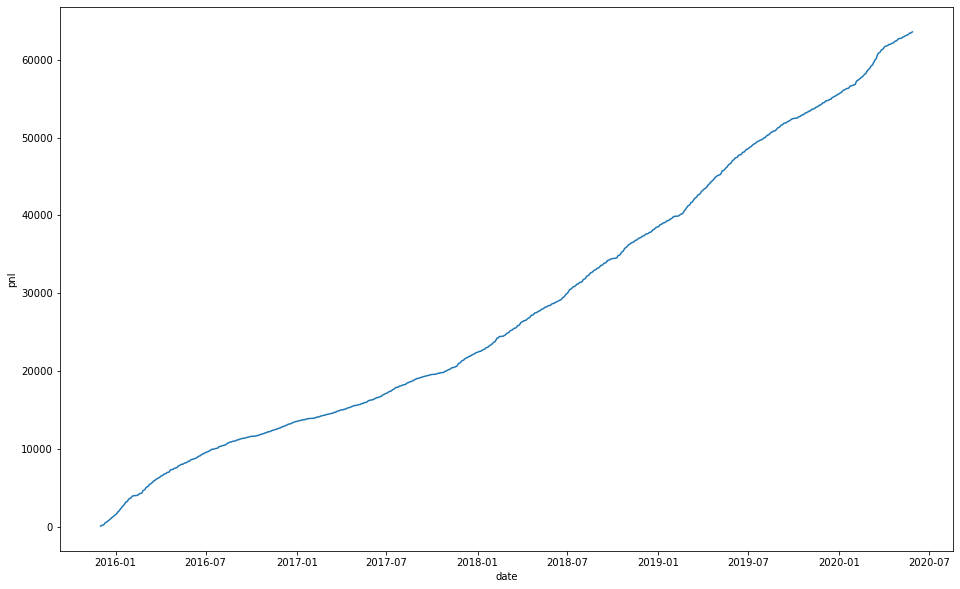

In [77]:
pd.DataFrame(get_performance(result_4,1), index=[0])

# sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 0 	25.177997 	0.000112 	8964.094589 	0.996337 	7.184982 	8.101115 	3100.567933


- we can see it's much better than before.
- Keep in mind that it uses future data here so the result is not realistic
- we just want to show that this scheme is much better than the previous one
- and we would use this backtest method in the future course

In [78]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl, product="IF", period=4096, tranct_ratio=True, threshold=0.002, tranct=0.25e-4, noise=5)
    result_5 = compute([delayed(f_par)(date) for date in all_dates])[0]

# Wall time: 40.8 s

Wall time: 40.8 s


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,5.45837,0.11883,8.41539,0.967949,17.546703,2.463745,1265.816868


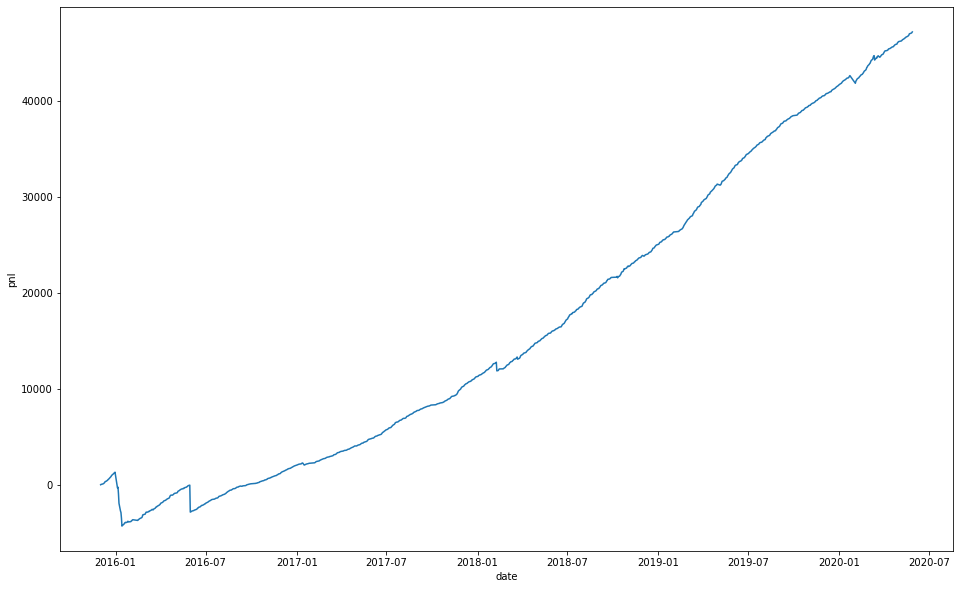

In [79]:
pd.DataFrame(get_performance(result_5,1), index=[0])

#  	sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 0 	5.45837 	0.11883 	8.41539 	0.967949 	17.546703 	2.463745 	1265.816868

- Previous method use fix size to trade, 
- now we suppose fix notional value of each trade

In [80]:
## daily pnl of fixed capital
from collections import OrderedDict
def get_daily_pnl(date, product="rb", period=2000, tranct_ratio=False,threshold=0.001, tranct=1.1e-4, noise=0, notional=False):
    with gzip.open(dire+"/"+date, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    data = cPickle.loads(raw_data)
    data = data[data["good"]].reset_index(drop=True)
    n_bar = len(data)
    unit = np.std(data["ret"])
    np.random.seed(10)
    noise_ret = np.random.normal(scale=unit*noise, size=n_bar)
    ##  we repeat the above code to get daily result
    ret_2000 = (data["ret"].rolling(period).sum()).dropna().reset_index(drop=True)
    ret_2000 = ret_2000.append(pd.Series([0]*(len(data)-len(ret_2000)))).reset_index(drop=True) + noise_ret
    signal = pd.Series([0] * n_bar)
    signal[ret_2000>threshold] = 1
    signal[ret_2000< -threshold] = -1
    position_pos = pd.Series([np.nan] * n_bar)
    position_pos[0] = 0
    position_pos[(signal==1) & (data["next.ask"]>0) & (data["next.bid"]>0)] = 1
    position_pos[(ret_2000< -threshold) & (data["next.bid"]>0)] = 0
    position_pos.ffill(inplace=True)
    pre_pos = position_pos.shift(1)
    position_pos[(position_pos==1) & (pre_pos==1)] = np.nan ## holding positio rather than trade, change to nan
    position_pos[(position_pos==1)] = 1/data["next.ask"][(position_pos==1)] ## use 1/price as trading volume
    position_pos.ffill(inplace=True) 
    position_neg = pd.Series([np.nan] * n_bar)
    position_neg[0] = 0
    position_neg[(signal==-1) & (data["next.ask"]>0) & (data["next.bid"]>0)] = -1
    position_neg[(ret_2000> threshold) & (data["next.ask"]>0)] = 0
    position_neg.ffill(inplace=True)
    pre_neg = position_neg.shift(1)
    position_neg[(position_neg==-1) & (pre_neg==-1)] = np.nan  ## holding positio rather than trade, change to nan
    position_neg[(position_neg==-1)] = -1/data["next.bid"][(position_neg==-1)] ## use 1/price as trading volume
    position_neg.ffill(inplace=True) ## replace nan by trading volume
    position = position_pos + position_neg
    position[0]=0
    position[n_bar-1] = 0
    position[n_bar-2] = 0
    change_pos = position - position.shift(1)
    change_pos[0] = 0
    change_base = pd.Series([0] * n_bar)
    change_buy = change_pos>0
    change_sell = change_pos<0

    if (tranct_ratio):
        change_base[change_buy] = data["next.ask"][change_buy]*(1+tranct)
        change_base[change_sell] = data["next.bid"][change_sell]*(1-tranct)
    else:
        change_base[change_buy] = data["next.ask"][change_buy]+tranct
        change_base[change_sell] = data["next.bid"][change_sell]-tranct
    final_pnl = -sum(change_base*change_pos)
    turnover = sum(change_base*abs(change_pos))
    num = sum((position!=0) & (change_pos!=0))
    hld_period = sum(position!=0)
  
    ## finally we combine the statistics into a data frame
    #result = pd.DataFrame({"final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}, index=[0])
    #result = {"date": date, "final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}
    result = OrderedDict([("date", date), ("final.pnl", final_pnl), ("turnover", turnover), ("num", num), ("hld.period", hld_period)])
    return result

In [81]:
get_daily_pnl(all_dates[0], product="IF", period=4096, tranct_ratio=True, threshold=0.001, tranct=0.25e-4, notional=True)

# OrderedDict([('date', '20151202.pkl'),
#              ('final.pnl', 0.03218863339638167),
#              ('turnover', 14.035810534651663),
#              ('num', 7),
#              ('hld.period', 22319)])

OrderedDict([('date', '20151202.pkl'),
             ('final.pnl', 0.03218863339638167),
             ('turnover', 14.035810534651663),
             ('num', 7),
             ('hld.period', 22319)])

In [82]:
 %%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl, product="IF", period=4096, tranct_ratio=True, 
                              threshold=0.001, tranct=0.25e-4, noise=0, notional=True)
    result = compute([delayed(f_par)(date) for date in all_dates])[0]
    
# Wall time: 42.1 s

Wall time: 42.1 s


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,24.956294,0.000129,7774.005139,0.996337,7.184982,0.002269,3100.567933


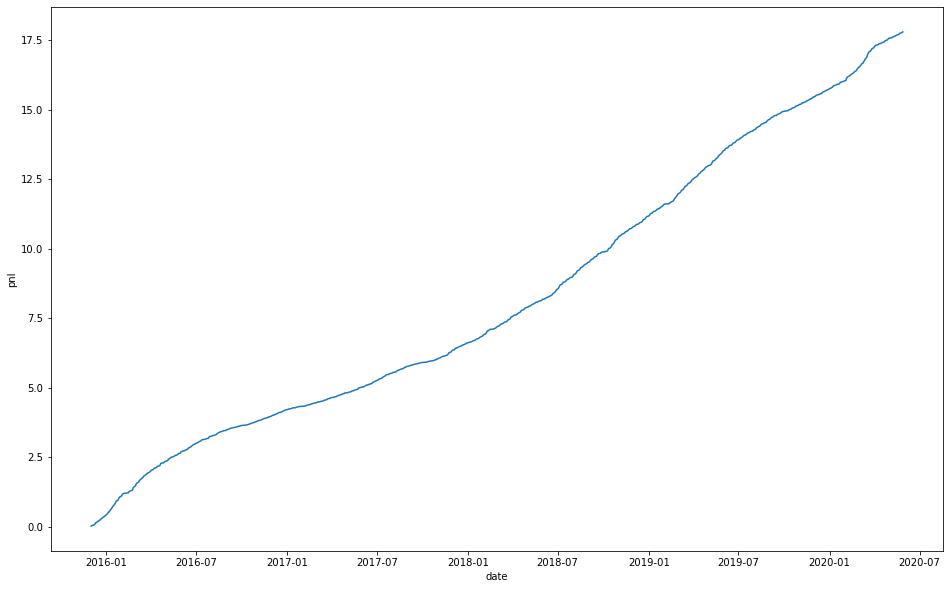

In [83]:
pd.DataFrame(get_performance(result,1), index=[0])

#  	sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 0 	24.956294 	0.000129 	7774.005139 	0.996337 	7.184982 	0.002269 	3100.567933


- After adding some noise, the result is worse than before but still pretty good